# Mise en évidence du non-isochronisme des oscillations du pendule pesant, épisode I

## Introduction: résolution d'une équation différentielle d'ordre 2 comme système de deux équations différentielles d'ordre 1

Avant de parler du pendule pesant, on va avoir besoin de savoir comment résoudre une équation différentielle d'ordre 2 en utilisant la fonction `odeint` du module `scipy.integrate`. Cette fonction ne permet de résoudre que des système différentiel d'ordre un, mais cela tombe bien car une équation différentielle d'ordre 2 peut se réécrire comme un certain système d'équations différentielles d'ordre 1. Prenons un cas général d'équation différentielle d'ordre deux où la dérivée seconde de la fonction $x(t)$ inconnue s'exprime comme une certaine fonction $g$ de la fonction $x(t)$, de sa dérivée $\dot{x} = \frac{\mathrm{d}x}{\mathrm{d}t}$ et du temps $t$. On a alors de manière générale
$$
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = g\big(x(t), \dot{x}(t), t\big)
$$
Or la dérivée seconde n'est autre que la dérivée de la dérivée première et la dérivée première est, comme son nom l'indique, la dérivée de notre fonction $x(t)$. On peut donc réécrire cela sous forme d'un système de deux équations d'ordre 1:
$$
\left\{
    \begin{array}{rcl}
       \dfrac{\mathrm{d}x}{\mathrm{d}t} &=& \dot{x} \\
       \dfrac{\mathrm{d}\dot{x}}{\mathrm{d}t} &=& g\big(x(t), \dot{x}(t), t\big) \\
    \end{array}
\right.
$$
Ainsi, en posant $y = \begin{pmatrix}x \\ \dot{x}\end{pmatrix}$, on a
$$
    \dfrac{\mathrm{d}y}{\mathrm{d}t} = f(y, t)
$$
où 
$$
f(y, t) = \begin{pmatrix}
               y_1 \\ 
               g(y_0, y_1, t)
          \end{pmatrix}
$$
en notant $y_0$ (à la manière informatique) la première composante de $y$ et $y_1$ la seconde.
Bref, en travaillant un peu, on retrouve bien ce que l'on a demandé à savoir une équadiff du second ordre transformée en équadiff du premier ordre sur un vecteur à deux dimensions.

## Résolution sur un exemple, équation de Van der Pol

L'oscillateur de Van der Pol est une équation différentielle d'oscillateur particulier qui se met à osciller «tout seul» une fois déplacé de son équilibre instable en $0$ (cf la page wikipédia: https://fr.wikipedia.org/wiki/Oscillateur_de_Van_der_Pol). C'est un oscillateur non-linéaire (donc intéressant !) dont l'équation est donnée par
$$
\frac{\mathrm{d}^2x(t)}{\mathrm{d}t^2} - \epsilon \omega_0 \left(1 - x^2(t) \right) \frac{\mathrm{d}x(t)}{\mathrm{d}t} + {\omega_0}^2 x(t) = 0
$$
On remarque tout de suite que, pour $x$ petit, le terme devant la dérivée première est négatif, donc on injecte de l'énergie dans le système, ce qui mène à la naissance des oscillations naturelles. L'équation est bien de la forme
$$
\frac{\mathrm{d}^2x}{\mathrm{d}t^2} = g\big(x(t), \dot{x}(t), t\big)
$$
avec
$$
g\big(x(t), \dot{x}(t), t\big) = \epsilon \omega_0 \left(1 - x^2(t) \right) \dot{x}(t) - {\omega_0}^2 x(t)
$$
On peut donc partir sur l'idée de la résolution précédente jusqu'à obtenir une représentation graphique de l'amplification progressive des oscillations jusqu'au cycle-limite dans le diagramme de phase.

Text(0, 0.5, 'Vitesse $v = \\dot{x}$')

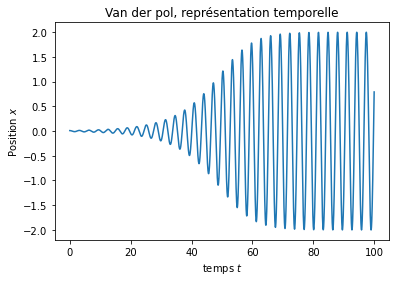

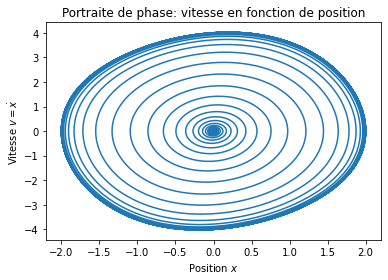

In [7]:
# Import des modules adéquats
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

# Les données du problème:
epsilon = 0.1
w0 = 2

# Conditions initiales
x0 = 0.01
v0 = 0
y0 = [x0, v0] # Le vecteur sur lequel portera l'équadiff d'ordre 1

# Définition du système différentiel
def van_der_pol(y, t):
    x, v = y # Récupération de la position et de la vitesse pour usage facile
    dxdt = v # la dérivée de x correspond à la vitesse
    # La dérivée de v correspond à l'accélération, calculée depuis l'équadiff
    dvdt = epsilon * w0 * (1 - x**2) * v - w0**2 * x
    # On revoit les dérivées des deux composantes de y
    return [dxdt, dvdt]

# Reste à définir l'intervalle d'intégration et faire l'intégration proprement dite
temps = np.linspace(0, 100, 10000) # 10000 points linéairement espacés de 0 à 100 s
sol = sp.integrate.odeint(van_der_pol, y0, temps)
# Récupération des positions et des vitesses
X = sol[:, 0]
V = sol[:, 1]

# Représentations graphiques
plt.plot(temps, X)
plt.title('Van der pol, représentation temporelle')
plt.xlabel('temps $t$')
plt.ylabel('Position $x$')

plt.figure() # On commence une nouvelle figure pour le portrait de phase
plt.plot(X, V)
plt.title('Portraite de phase: vitesse en fonction de position')
plt.xlabel('Position $x$')
plt.ylabel('Vitesse $v = \\dot{x}$')

## Ce qu'on vous demande de faire

À votre tour de travailler. On veut étudier l'équation différentielle du pendule pesant (qu'il vous faut retrouver, mais vous pouvez vous aider de cette vidéo ["Le pendule pesant, DiaN"](https://youtu.be/ATOgO_akMyQ)). Bien entendu, vous recevrez dans les données tout ce qu'il vous faut pour la résoudre, en particulier:
* la masse $m$ (variable `m`) du pendule ;
* son moment d'inertie $I_\Delta$ par rapport à l'axe $\Delta$ (variable `I_Delta`) ;
* l'écart $OG$ de son centre de gravité par rapport au point de fixation (variable `OG`) ;
* une liste de vitesses initiales pour $\theta$ (variable `liste_thetapoint0`) ;
* un `np.array` qui contient tous les temps sur lesquels faire l'intégration numérique (variable `temps`)

On va supposer que tous les pendules démarrent au point origine ($\theta_0=0$) et le but de ce CapNum est d'observer qu'à mesure que les amplitudes augmentent, la période va elle aussi avoir tendance à changer à mesure que l'on s'éloigne des petites oscillations. Vous allez donc observer l'évolution de la période en fonction de l'amplitude et mettre dans la variable `reponse` la liste des périodes calculées pour chacune des conditions initiales.

In [9]:
# Import des données, à savoir:
# * `m` la masse du pendule
# * `I_Delta` son moment d'inertie par rapport à l'axe \Delta
# * `OG` l'écart de son centre de gravité par rapport au point de fixation O
# * `liste_thetapoint0` la liste des vitesse angulaire initiales à prendre
# * `temps` le np.array des temps sur lesquels faire l'intégration numérique
from donnees import *

# Il vous faut définir la fonction qui servira pour l'intégration numérique
# (la même pour toutes les conditions initiales)

def pendule_pesant(y, t):
    theta, thetapoint = y # On vous donne le début


# Pour chaque condition initiale, il s'agit d'intégrer l'équadiff du pendule pesant
# et calculer période et amplitude




# Une petite représentation de la période en fonction de l'amplitude



# et finalement on stocke dans la variable réponse l'ensemble des périodes calculées 
# (dans l'ordre, bien sûr)

reponse = "liste des périodes calculées"

print("Votre réponse:", reponse)


Votre réponse: liste des périodes calculées
